<a href="https://colab.research.google.com/github/SupernovaeAsrto/Task-2_Codsoft_Kavya_data_Science/blob/main/Kavya_Task_2_Codsoft_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import Random forest
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
 #Load the Iris dataset
iris = load_iris()
iris_data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

In [ ]:
# Split the data into features and target
X = iris_data.drop('target', axis=1)
y = iris_data['target']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Initialize a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_test_prediction = model.predict(X_test)

In [ ]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_test_prediction)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_test_prediction))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.9666666666666668


feature importance

In [ ]:
#feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")


Feature Importance:
petal length (cm): 0.4400
petal width (cm): 0.4215
sepal length (cm): 0.1081
sepal width (cm): 0.0304


Use KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)

Train KNN classifier

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Evaluate model

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.])

In [ ]:
y_test

73     1.0
18     0.0
118    2.0
78     1.0
76     1.0
31     0.0
64     1.0
141    2.0
68     1.0
82     1.0
110    2.0
12     0.0
36     0.0
9      0.0
19     0.0
56     1.0
104    2.0
69     1.0
55     1.0
132    2.0
29     0.0
127    2.0
26     0.0
128    2.0
131    2.0
145    2.0
108    2.0
143    2.0
45     0.0
30     0.0
Name: target, dtype: float64

check accuracy

In [ ]:
from sklearn.metrics import top_k_accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [ ]:
# Reduce the data to 2D for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

In [ ]:
# Create a DataFrame for visualization
iris_visualization = pd.DataFrame(data=np.c_[X_2d, y], columns=['PCA1', 'PCA2', 'target'])



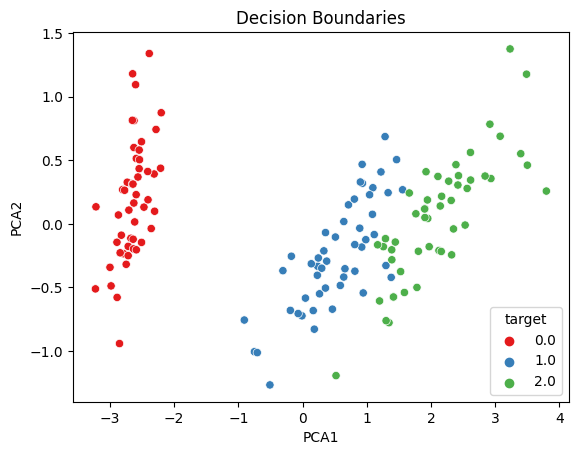

In [ ]:
# Plot the decision boundaries
sns.scatterplot(x='PCA1', y='PCA2', hue='target', data=iris_visualization, palette='Set1', marker='o')
plt.title('Decision Boundaries')
plt.show()

confusion matrix

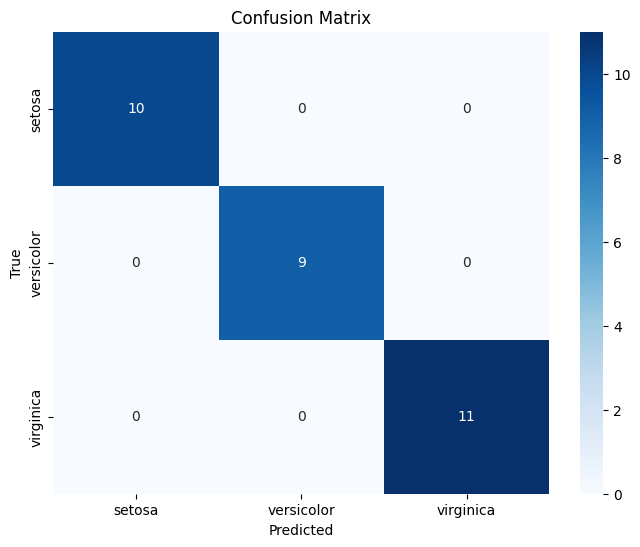

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

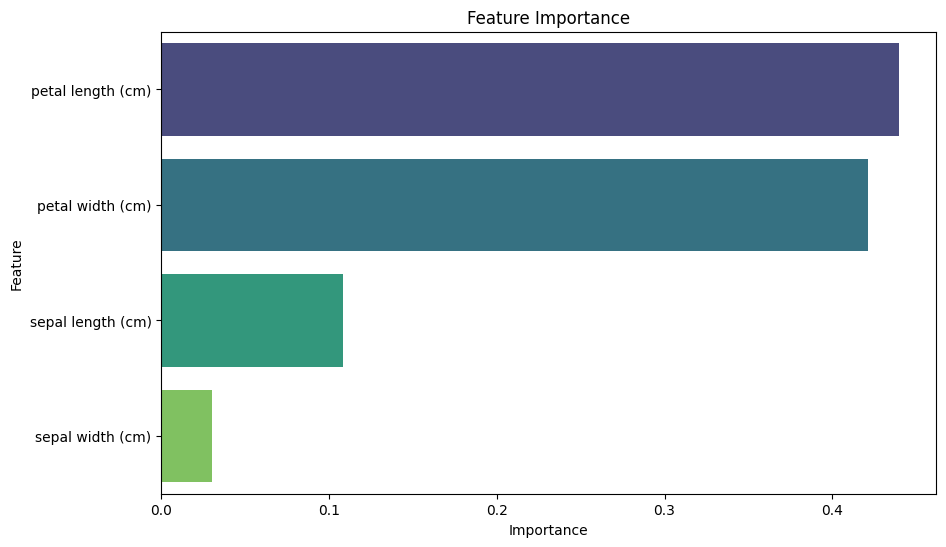

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=[item[1] for item in sorted_feature_importance], y=[item[0] for item in sorted_feature_importance], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()